# Torch basics

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

In [2]:
torch.__version__

'0.4.0'

Construct a 5x3 matrix, uninitialized:

In [3]:
x = torch.Tensor(5, 3)
print(x)

tensor([[-6.5551e-25,  3.0652e-41,  5.7453e-44],
        [ 0.0000e+00,         nan,  4.5602e-41],
        [ 1.3733e-14,  6.4076e+07,  2.0706e-19],
        [ 7.3909e+22,  2.4176e-12,  1.1625e+33],
        [ 8.9605e-01,  1.1632e+33,  5.6003e-02]])


In [4]:
print(x.size())

torch.Size([5, 3])


### Bridge to numpy

In [5]:
y = x.numpy()
print(y)

[[-6.5551107e-25  3.0652003e-41  5.7453237e-44]
 [ 0.0000000e+00            nan  4.5602456e-41]
 [ 1.3733248e-14  6.4076068e+07  2.0705790e-19]
 [ 7.3908551e+22  2.4176312e-12  1.1625173e+33]
 [ 8.9604813e-01  1.1631511e+33  5.6003008e-02]]


In [6]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(b)

tensor([ 1.,  1.,  1.,  1.,  1.], dtype=torch.float64)


In [7]:
xr = torch.rand(5, 3)
print(xr)

tensor([[ 0.0986,  0.6141,  0.5994],
        [ 0.9025,  0.2100,  0.5646],
        [ 0.8178,  0.9599,  0.5931],
        [ 0.2228,  0.3542,  0.6499],
        [ 0.8790,  0.8005,  0.9973]])


In [8]:
print(x+xr)

tensor([[ 9.8568e-02,  6.1411e-01,  5.9942e-01],
        [ 9.0246e-01,         nan,  5.6456e-01],
        [ 8.1784e-01,  6.4076e+07,  5.9310e-01],
        [ 7.3909e+22,  3.5422e-01,  1.1625e+33],
        [ 1.7750e+00,  1.1632e+33,  1.0533e+00]])


In [9]:
x.add_(xr)
print(x)

tensor([[ 9.8568e-02,  6.1411e-01,  5.9942e-01],
        [ 9.0246e-01,         nan,  5.6456e-01],
        [ 8.1784e-01,  6.4076e+07,  5.9310e-01],
        [ 7.3909e+22,  3.5422e-01,  1.1625e+33],
        [ 1.7750e+00,  1.1632e+33,  1.0533e+00]])


Any operation that mutates a tensor in-place is post-fixed with an ```_```

For example: ```x.copy_(y)```, ```x.t_()```, will change ```x```.

Also be careful, changing the torch tensor modify the numpy array and vice-versa...

In [10]:
print(y)

[[9.8568261e-02 6.1410874e-01 5.9942144e-01]
 [9.0245593e-01           nan 5.6456381e-01]
 [8.1783605e-01 6.4076068e+07 5.9310442e-01]
 [7.3908551e+22 3.5422081e-01 1.1625173e+33]
 [1.7750484e+00 1.1631511e+33 1.0532657e+00]]


In [11]:
np.add(a, 1, out=a)
print(b)

tensor([ 2.,  2.,  2.,  2.,  2.], dtype=torch.float64)


In [12]:
if torch.cuda.is_available():
    x = x.cuda()
    y = torch.from_numpy(y).cuda()
    print(x + y)

# Autograd: automatic differentiation

In [13]:
x = torch.ones(2, 2)
print(x)

tensor([[ 1.,  1.],
        [ 1.,  1.]])


In [14]:
x.requires_grad

False

In [15]:
x.numpy()

array([[1., 1.],
       [1., 1.]], dtype=float32)

In [16]:
x.requires_grad_(True)
x.requires_grad

True

In [17]:
x.detach().numpy()

array([[1., 1.],
       [1., 1.]], dtype=float32)

In [18]:
x.data.numpy()

array([[1., 1.],
       [1., 1.]], dtype=float32)

In [19]:
x.requires_grad

True

In [20]:
y = x + 2
print(y)

tensor([[ 3.,  3.],
        [ 3.,  3.]])


In [21]:
y.requires_grad

True

In [22]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[ 27.,  27.],
        [ 27.,  27.]]) tensor(27.)


After the computation is finished, i.e. _forward pass_, you can call ```.backward()``` and have all the gradients computed automatically.

In [23]:
out.backward(retain_graph=True)

The gradients w.r.t. this variable is accumulated into ```.grad```.

In [24]:
print(x.grad)

tensor([[ 4.5000,  4.5000],
        [ 4.5000,  4.5000]])


Let’s call the ``out``
*Variable* “$o$”.
We have that:

$o = \frac{1}{4}\sum_i z_i$ 

$z_i = 3(x_i+2)^2$ 

$z_i\bigr\rvert_{x_i=1} = 27$.

Taking partial derivatives give:
$\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$, hence
$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$.

In [25]:
print(z.grad)

None


In [26]:
out.backward(torch.Tensor([2.0]),retain_graph=True)

In [27]:
print(x.grad)

tensor([[ 13.5000,  13.5000],
        [ 13.5000,  13.5000]])


In [28]:
# Manually zero the gradients after updating weights
x.grad.data.zero_()

tensor([[ 0.,  0.],
        [ 0.,  0.]])

The gradients must be set to zero manually. Otherwise they will cumulate across several _.backward()_ calls. 
This functionality is useful for Recurrent Neural Networks, but otherwise needs to be zeroed at each iteration.

In [29]:
out.backward()

In [30]:
print(x.grad)

tensor([[ 4.5000,  4.5000],
        [ 4.5000,  4.5000]])


# Playing with pytorch: linear regression

## Warm-up: Linear regression with numpy

Our model is:
$$
y_t = 2x^1_t-3x^2_t+1, \quad t\in\{1,\dots,30\}
$$

Our task is given the 'observations' $(x_t,y_t)_{t\in\{1,\dots,30\}}$ to recover the weights $w^1=2, w^2=-3$ and the bias $b = 1$.

In order to do so, we will solve the following optimization problem:
$$
\underset{w^1,w^2,b}{\operatorname{argmin}} \sum_{t=1}^{30} \left(w^1x^1_t+w^2x^2_t+b-y_t\right)^2
$$

In [31]:
import numpy as np
from numpy.random import random
# generate random input data
x = random((30,2))

# generate labels corresponding to input data x
y = np.dot(x, [2., -3.]) + 1.
w_source = np.array([2., -3.])
b_source  = np.array([1.])

In [32]:
x[:5]

array([[0.74612057, 0.93566947],
       [0.97141475, 0.29129419],
       [0.56735242, 0.75956126],
       [0.26597469, 0.77320598],
       [0.17324456, 0.18497529]])

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_figs(fig_num, elev, azim, x, y, weights, bias):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)
    ax.scatter(x[:, 0], x[:, 1], y)
    ax.plot_surface(np.array([[0, 0], [1, 1]]),
                    np.array([[0, 1], [0, 1]]),
                    (np.dot(np.array([[0, 0, 1, 1],
                                          [0, 1, 0, 1]]).T, weights) + bias).reshape((2, 2)),
                    alpha=.5)
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_zlabel('y')
    
def plot_views(x, y, w, b):
    #Generate the different figures from different views
    elev = 43.5
    azim = -110
    plot_figs(1, elev, azim, x, y, w, b[0])

    #elev = -.5
    #azim = 0
    #plot_figs(2, elev, azim, x, y, w, b[0])

    #elev = -.5
    #azim = 90
    #plot_figs(3, elev, azim, x, y, w, b[0])

    plt.show()

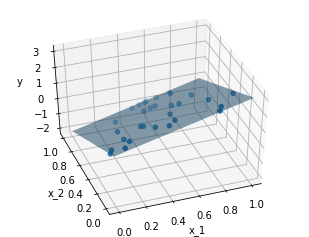

In [34]:
plot_views(x, y, w_source, b_source)

In vector form, we define:
$$
\hat{y}_t = {\bf w}^T{\bf x}_t+b
$$
and we want to minimize the loss given by:
$$
loss = \sum_t\underbrace{\left(\hat{y}_t-y_t \right)^2}_{loss_t}.
$$

To minimize the loss we first compute the gradient of each $loss_t$:
\begin{eqnarray*}
\frac{\partial{loss_t}}{\partial w^1} &=& 2x^1_t\left({\bf w}^T{\bf x}_t+b-y_t \right)\\
\frac{\partial{loss_t}}{\partial w^2} &=& 2x^2_t\left({\bf w}^T{\bf x}_t+b-y_t \right)\\
\frac{\partial{loss_t}}{\partial b} &=& 2\left({\bf w}^T{\bf x}_t+b-y_t \right)
\end{eqnarray*}

For one epoch, **Stochastic Gradient Descent with minibatches of size 1** then updates the weigts and bias by running the following loop: 

for $t \in \{1,\dots,30\}$, 

\begin{eqnarray*}
w^1_{t+1}&=&w^1_{t}-\alpha\frac{\partial{loss_t}}{\partial w^1} \\
w^2_{t+1}&=&w^2_{t}-\alpha\frac{\partial{loss_t}}{\partial w^2} \\
b_{t+1}&=&b_{t}-\alpha\frac{\partial{loss_t}}{\partial b},
\end{eqnarray*}

if $t = 30$, set $w^1_1=w^1_{31}$, $w^2_1 = w^2_{31}$ and $b_1=b_{31}$.

$\alpha>0$ is called the learning rate.

Then we run several epochs...

In [35]:
# randomly initialize learnable weights and bias
w_init = random(2)
b_init = random(1)

w = w_init
b = b_init
print("initial values of the parameters:", w, b )


# our model forward pass
def forward(x):
    return x.dot(w)+b

# Loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)**2 

print("initial loss:", np.sum([loss(x_val,y_val) for x_val, y_val in zip(x, y)]) )

# compute gradient
def gradient(x, y):  # d_loss/d_w, d_loss/d_c
    return 2*(x.dot(w)+b - y)*x, 2 * (x.dot(w)+b - y)
 
learning_rate = 1e-2
# Training loop with minibatch (of size 1)
for epoch in range(10):
    l = 0
    for x_val, y_val in zip(x, y):
        grad_w, grad_b = gradient(x_val, y_val)
        w = w - learning_rate * grad_w
        b = b - learning_rate * grad_b
        l += loss(x_val, y_val)

    print("progress:", "epoch:", epoch, "loss",l[0])

# After training
print("estimation of the parameters:", w, b )

initial values of the parameters: [0.90572755 0.70790535] [0.53457446]
initial loss: 62.950108516027754
progress: epoch: 0 loss 42.558817702434204
progress: epoch: 1 loss 28.471617912030386
progress: epoch: 2 loss 24.23540837057265
progress: epoch: 3 loss 21.805351812456706
progress: epoch: 4 loss 19.85678864341762
progress: epoch: 5 loss 18.13908861628516
progress: epoch: 6 loss 16.588120076373606
progress: epoch: 7 loss 15.177867770369915
progress: epoch: 8 loss 13.89241035897763
progress: epoch: 9 loss 12.719506806492591
estimation of the parameters: [ 0.90322708 -0.86023537] [0.41325927]


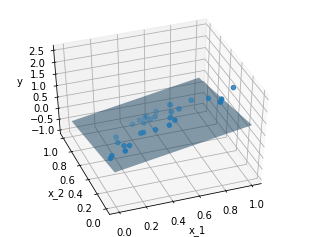

In [36]:
plot_views(x, y, w, b)

Note that the actual gradient of the loss is given by:
$$
\frac{\partial{loss}}{\partial w^1} =\sum_t \frac{\partial{loss_t}}{\partial w^1},\quad
\frac{\partial{loss}}{\partial w^2} =\sum_t \frac{\partial{loss_t}}{\partial w^2},\quad
\frac{\partial{loss}}{\partial b} =\sum_t \frac{\partial{loss_t}}{\partial b}
$$

For one epoch, **(Batch) Gradient Descent** updates the weights and bias as follows:
\begin{eqnarray*}
w^1_{new}&=&w^1_{old}-\alpha\frac{\partial{loss}}{\partial w^1} \\
w^2_{new}&=&w^2_{old}-\alpha\frac{\partial{loss}}{\partial w^2} \\
b_{new}&=&b_{old}-\alpha\frac{\partial{loss}}{\partial b},
\end{eqnarray*}

and then we run several epochs.

In [37]:
w = w_init
b = b_init
print("initial values of the parameters:", w, b )

learning_rate = 1e-2
# Training loop
for epoch in range(10):
    grad_w = np.array([0,0])
    grad_b = np.array(0)
    l = 0
    for x_val, y_val in zip(x, y):
        grad_w = np.add(grad_w,gradient(x_val, y_val)[0])
        grad_b = np.add(grad_b,gradient(x_val, y_val)[1])
        l += loss(x_val, y_val)
    w = w - learning_rate * grad_w
    b = b - learning_rate * grad_b
    print("progress:", "epoch:", epoch, "loss",l[0])

# After training
print("estimation of the parameters:", w, b)

initial values of the parameters: [0.90572755 0.70790535] [0.53457446]
progress: epoch: 0 loss 62.95010851602775
progress: epoch: 1 loss 28.41000242089666
progress: epoch: 2 loss 25.819956793431494
progress: epoch: 3 loss 23.596294852235108
progress: epoch: 4 loss 21.56938750243228
progress: epoch: 5 loss 19.72095853827564
progress: epoch: 6 loss 18.03503286022564
progress: epoch: 7 loss 16.497082760830725
progress: epoch: 8 loss 15.093893167071199
progress: epoch: 9 loss 13.813442243650032
estimation of the parameters: [ 0.88816212 -0.87456673] [0.38777395]


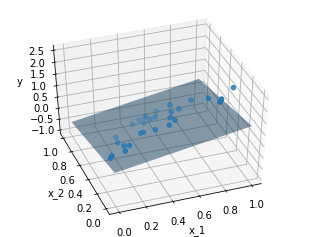

In [38]:
plot_views(x, y, w, b)

## Linear regression with tensors

In [39]:
dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # Uncomment this to run on GPU

In [40]:
x_t = torch.from_numpy(x).type(dtype)
y_t = torch.from_numpy(y).type(dtype).unsqueeze(1)

This is an implementation of **(Batch) Gradient Descent** with tensors.

Note that in the main loop, the functions loss_t and gradient_t are always called with the same inputs: they can easily be incorporated into the loop (we'll do that below).

In [41]:
w_init_t = torch.from_numpy(w_init).type(dtype)
b_init_t = torch.from_numpy(b_init).type(dtype)

w_t = w_init_t.clone()
w_t.unsqueeze_(1)
b_t = b_init_t.clone()
b_t.unsqueeze_(1)
print("initial values of the parameters:", w_t, b_t )

# our model forward pass
def forward_t(x):
    return x.mm(w_t)+b_t

# Loss function
def loss_t(x, y):
    y_pred = forward_t(x)
    return (y_pred - y).pow(2).sum()

# compute gradient
def gradient_t(x, y):  # d_loss/d_w, d_loss/d_c
    return 2*torch.mm(torch.t(x),x.mm(w_t)+b_t - y), 2 * (x.mm(w_t)+b_t - y).sum()

learning_rate = 1e-2
for epoch in range(10):
    l_t = loss_t(x_t,y_t)
    grad_w, grad_b = gradient_t(x_t,y_t)
    w_t = w_t-learning_rate*grad_w
    b_t = b_t-learning_rate*grad_b
    print("progress:", "epoch:", epoch, "loss",l_t)

# After training
print("estimation of the parameters:", w_t, b_t )

initial values of the parameters: tensor([[ 0.9057],
        [ 0.7079]]) tensor([[ 0.5346]])
progress: epoch: 0 loss tensor(62.9501)
progress: epoch: 1 loss tensor(28.4100)
progress: epoch: 2 loss tensor(25.8200)
progress: epoch: 3 loss tensor(23.5963)
progress: epoch: 4 loss tensor(21.5694)
progress: epoch: 5 loss tensor(19.7210)
progress: epoch: 6 loss tensor(18.0350)
progress: epoch: 7 loss tensor(16.4971)
progress: epoch: 8 loss tensor(15.0939)
progress: epoch: 9 loss tensor(13.8134)
estimation of the parameters: tensor([[ 0.8882],
        [-0.8746]]) tensor([[ 0.3878]])


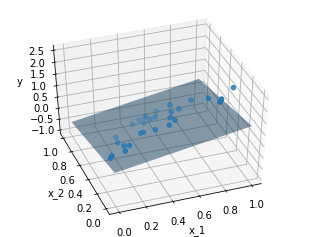

In [42]:
plot_views(x, y, w_t.numpy(), b_t.numpy())

## Linear regression with Autograd

In [44]:
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Variables during the backward pass.
w_v = w_init_t.clone().unsqueeze(1)
w_v.requires_grad_(True)
b_v = b_init_t.clone().unsqueeze(1)
b_v.requires_grad_(True)
print("initial values of the parameters:", w_v.data, b_v.data )

initial values of the parameters: tensor([[ 0.9057],
        [ 0.7079]]) tensor([[ 0.5346]])


An implementation of **(Batch) Gradient Descent** without computing explicitly the gradient and using autograd instead.

In [52]:
for epoch in range(10):
    y_pred = x_t.mm(w_v)+b_v
    loss = (y_pred - y_t).pow(2).sum()
    
    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Variables with requires_grad=True.
    # After this call w.grad and b.grad will be Variables holding the gradient
    # of the loss with respect to w and b respectively.
    loss.backward()
    # Update weights using gradient descent; w.data and b.data are Tensors,
    # w.grad and b.grad are Variables and w.grad.data and b.grad.data are
    # Tensors.
    w_v.data -= learning_rate * w_v.grad.data
    b_v.data -= learning_rate * b_v.grad.data
    
    # Manually zero the gradients after updating weights
    # otherwise gradients will be acumulated after each .backward()
    w_v.grad.data.zero_()
    b_v.grad.data.zero_()
    
    print("progress:", "epoch:", epoch, "loss",loss.data.item())

# After training
print("estimation of the parameters:", w_v.data, b_v.data.t() )

progress: epoch: 0 loss 12.644793510437012
progress: epoch: 1 loss 11.577995300292969
progress: epoch: 2 loss 10.60399341583252
progress: epoch: 3 loss 9.714548110961914
progress: epoch: 4 loss 8.902162551879883
progress: epoch: 5 loss 8.160012245178223
progress: epoch: 6 loss 7.481887340545654
progress: epoch: 7 loss 6.862131595611572
progress: epoch: 8 loss 6.295600891113281
progress: epoch: 9 loss 5.777608871459961
estimation of the parameters: tensor([[ 1.1453],
        [-1.6392]]) tensor([[ 0.6830]])


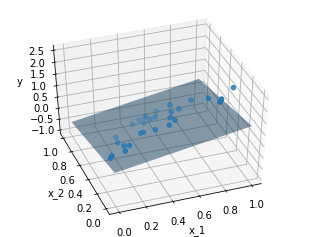

In [46]:
plot_views(x, y, w_v.data.numpy(), b_v.data.numpy())

## Linear regression with neural network

An implementation of **(Batch) Gradient Descent** using the nn package. Here we have a super simple model with only one layer and no activation function!

In [50]:
# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Variables for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1),
)

for m in model.children():
    m.weight.data = w_init_t.clone().unsqueeze(0)
    m.bias.data = b_init_t.clone()

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(size_average=False)

# switch to train mode
model.train()

for epoch in range(10):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Variable of input data to the Module and it produces
    # a Variable of output data.
    y_pred = model(x_t)
  
    # Note this operation is equivalent to: pred = model.forward(x_v)

    # Compute and print loss. We pass Variables containing the predicted and true
    # values of y, and the loss function returns a Variable containing the
    # loss.
    loss = loss_fn(y_pred, y_t)

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Variables with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Variable, so
    # we can access its data and gradients like we did before.
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data
        
    print("progress:", "epoch:", epoch, "loss",loss.data.item())

# After training
print("estimation of the parameters:")
for param in model.parameters():
    print(param)

progress: epoch: 0 loss 62.950103759765625
progress: epoch: 1 loss 28.410001754760742
progress: epoch: 2 loss 25.819957733154297
progress: epoch: 3 loss 23.59630012512207
progress: epoch: 4 loss 21.56938934326172
progress: epoch: 5 loss 19.720958709716797
progress: epoch: 6 loss 18.035032272338867
progress: epoch: 7 loss 16.49708366394043
progress: epoch: 8 loss 15.093893051147461
progress: epoch: 9 loss 13.81344223022461
estimation of the parameters:
Parameter containing:
tensor([[ 0.8882, -0.8746]])
Parameter containing:
tensor([ 0.3878])


Last step, we use directly the optim package to update the weights and bias.

In [51]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1),
)

for m in model.children():
    m.weight.data = w_init_t.clone().unsqueeze(0)
    m.bias.data = b_init_t.clone()

loss_fn = torch.nn.MSELoss(size_average=False)

model.train()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


for epoch in range(10):
    y_pred = model(x_t)
    loss = loss_fn(y_pred, y_t)
    print("progress:", "epoch:", epoch, "loss",loss.data.item())
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
# After training
print("estimation of the parameters:")
for param in model.parameters():
    print(param)

progress: epoch: 0 loss 62.950103759765625
progress: epoch: 1 loss 28.410001754760742
progress: epoch: 2 loss 25.819957733154297
progress: epoch: 3 loss 23.59630012512207
progress: epoch: 4 loss 21.56938934326172
progress: epoch: 5 loss 19.720958709716797
progress: epoch: 6 loss 18.035032272338867
progress: epoch: 7 loss 16.49708366394043
progress: epoch: 8 loss 15.093892097473145
progress: epoch: 9 loss 13.813441276550293
estimation of the parameters:
Parameter containing:
tensor([[ 0.8882, -0.8746]])
Parameter containing:
tensor([ 0.3878])


## Exercise 1: Play with the code

Change the number of samples from 30 to 300. What happens? How to correct it?

In the initialization phase, remove the .clone() What happens? Why?

## Exercise 2: Logistic regression

Sigmoid function:
$$
\sigma(y) = \frac{1}{1+e^{-y}}
$$

The model is now
$$
Z_t = Ber(\sigma(y_t)), \quad t\in\{1,\dots,30\},
$$
and the task is still to recover the weights $w^1=2, w^2=-3$ and the bias $b = 1$ but now from the observations $(x_t,Z_t)_{t\in \{1,\dots,30\}}$.

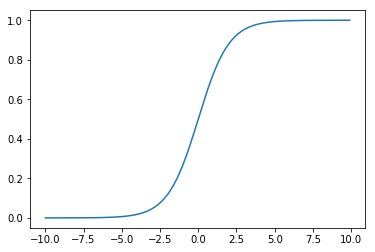

In [44]:
from scipy.special import expit
xaxis = np.arange(-10.0, 10.0, 0.1)
plt.plot(xaxis,[expit(x) for x in xaxis]);

You might need to install scipy first by runing:

$ pip3 install scipy

In [45]:
from scipy.stats import bernoulli
Z = bernoulli.rvs(expit(y))

What is an appropriate loss function now?